In [1]:
#Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import math

In [2]:
Life_Expectancy=pd.read_csv("Data_Set_DatMin.csv") #Read data CSV menggunakan pandas

data = Life_Expectancy.copy()
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [3]:
data.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,635.372310,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
data.corr() 

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101679,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461854,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296629,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108562,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354891,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899340,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.084453,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076580,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301720,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112220,0.544423,0.467789,0.472263,-0.163305,-0.209373


<AxesSubplot:>

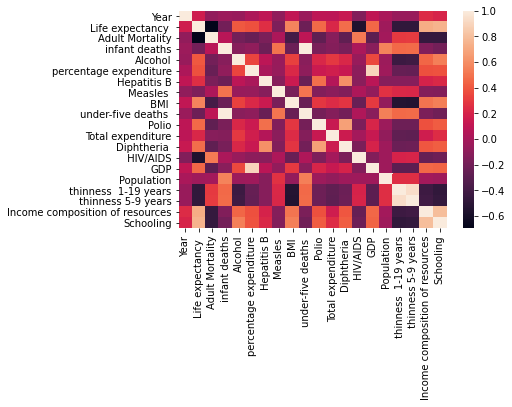

In [5]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [6]:
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [29]:
#Rename kolom-kolom dataset
orig_cols = list(data.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').replace('-', '_').replace('/','_').lower()) #nama-nama colom di replace

print(new_cols)    
data.columns = new_cols #Replace kolom lama dengan yg baru
data.rename(columns={'thinness_1_19_years':'thinness_10_19_years'}, inplace=True)

['country', 'year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness_10_19_years', 'thinness_5_9_years', 'income_composition_of_resources', 'schooling']


In [10]:
print(data.columns)

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


In [11]:
print(data.isna().sum()) #Hitung jumlah NaN di masing-masing kolom

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                447
population                         652
thinness_10_19_years                34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64


In [12]:
cek=[]
cnt=0
year_cnt=[]

for i in data.country:
    if i not in cek: 
        if len(cek) !=0: 
            year_cnt.append(cnt) 
            cnt=0 
        cek.append(i) 
        cnt+=1 
    else:
        cnt+=1 
year_cnt.append(cnt) 
drop=[]
for i in range(len(year_cnt)): 
    if year_cnt[i]!=16:
        print(cek[i])
        drop.append(cek[i])

print(drop)

data=data.set_index("country").drop(drop).reset_index() 
# print(data)

Cook Islands
Dominica
Marshall Islands
Monaco
Nauru
Niue
Palau
Saint Kitts and Nevis
San Marino
Tuvalu
['Cook Islands', 'Dominica', 'Marshall Islands', 'Monaco', 'Nauru', 'Niue', 'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Tuvalu']


In [ ]:
print(data.set_index('country'))

In [13]:
# Adult Mortality (Kematian dewasa) is never below 35 and over 600 in reality
drop=list(data.adult_mortality)
test=data.copy()
for i in range(len(drop)):
    if drop[i] < 35 or drop[i] > 600:
        test.at[i,"adult_mortality"]=np.nan


print(data.isna().sum())
print(test.isna().sum())

data=test   



country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            193
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 32
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                442
population                         644
thinness_10_19_years                32
thinness_5_9_years                  32
income_composition_of_resources    160
schooling                          160
dtype: int64
country                              0
year                                 0
status                               0
life_expecta

In [ ]:
print(len(data.adult_mortality))
print(test)

In [ ]:
# Infant deaths (kematian bayi) cannot be below 2/1000 or more than 1000
drop=list(data.infant_deaths)
test=data.copy()
for i in range(len(drop)):
    if drop[i] < 2 or drop[i] > 900:
        test.loc[i,"infant_deaths"]=np.nan


print(test)
data=test  


In [14]:
# under 5 deaths cannot be below 2/1000 or more than 1000
drop=list(data.infant_deaths)
test=data.copy()
for i in range(len(drop)):
    if drop[i] < 3 or drop[i] > 800:
        test.loc[i,"under_five_deaths"]=np.nan
        
data=test  


In [37]:
# BMI average for any country is never below 20.5 or higher than 32.5 --> masih ragu-ragu (paling rendah 18 atau 20 ?)
drop=list(data.infant_deaths)
test=data.copy()
for i in range(len(drop)):
    if drop[i] < 18 or drop[i] > 33:
        test.at[i,"bmi"]=np.nan

data=test  


In [ ]:
# Measles Case never above 1000
drop=list(data.measles)
test=data.copy()
for i in range(len(drop)):
    if drop[i] > 1000:
        test.at[i,"measles"]=np.nan

data=test  

In [ ]:
# Percentage Expenditure never above 100% or bellow 1%
drop=list(data.percentage_expenditure)
test=data.copy()
for i in range(len(drop)):
    if drop[i] < 1 or drop[i] > 100:
        test.at[i,"percentage_expenditure"]=np.nan

data=test  

In [14]:
# Population changes hugely each year in each country
drop=list(data.population)
test=data.copy()
cnt,cnt2=0,16 

for i in range(183):     
    if not math.isnan(max(drop[cnt:cnt2])): 
        max_digits=len(str(int(max(drop[cnt:cnt2]))))
        for j in range(cnt,cnt2): 
            if len(str(int(drop[j])))<max_digits: 
                curr_digits=len(str(int(drop[j]))) 
                difference=max_digits-curr_digits 
                for k in range (difference): 
                    drop[j]=float(str(int(drop[j]))+"0") 
                test.at[j,'population']=drop[j] 

    cnt=cnt2
    cnt2+=16

data=test  

In [15]:
print(data.population)

0       33736494.0
1       32758200.0
2       31731688.0
3       36969580.0
4       29785990.0
           ...    
2923    12777511.0
2924    12633897.0
2925    12552500.0
2926    12366165.0
2927    12222251.0
Name: population, Length: 2928, dtype: float64


In [16]:
#GDP value has a floting point placement error
drop=list(data.gdp)
test=data.copy()
cnt,cnt2=0,16
for i in range(183):  
    if not math.isnan(max(drop[cnt:cnt2])): 
        max_digits=len(str(int(max(drop[cnt:cnt2]))))
        for j in range(cnt,cnt2):
            if not math.isnan(drop[j]) and len(str(int(drop[j])))<max_digits:
                curr_digits=len(str(int(drop[j]))) 
                difference=max_digits-curr_digits 
                for k in range (difference): 
                    drop[j]*=10
                test.at[j,'gdp']=drop[j]

    cnt=cnt2
    cnt2+=16

data=test  
print(test.gdp)

0       584.259210
1       612.696514
2       631.744976
3       669.959000
4       635.372310
           ...    
2923    454.366654
2924    453.351155
2925    573.483400
2926    548.587312
2927    547.358878
Name: gdp, Length: 2928, dtype: float64


In [18]:
#Mengisi semua cell yang nilai nya NaN dengan nilai mean per kolom
data.fillna(data.mean(), inplace=True) 
print(data.isna().sum())

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_10_19_years               0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64


In [17]:
print(data.mean())

year                               2.007500e+03
life_expectancy                    6.922493e+01
adult_mortality                    1.865814e+02
infant_deaths                      3.040745e+01
alcohol                            4.614856e+00
percentage_expenditure             7.403212e+02
hepatitis_b                        8.096084e+01
measles                            2.427856e+03
bmi                                3.823539e+01
under_five_deaths                  4.217930e+01
polio                              8.254830e+01
total_expenditure                  5.930163e+00
diphtheria                         8.232142e+01
hiv/aids                           1.747712e+00
gdp                                1.677676e+04
population                         3.205455e+07
thinness_10_19_years               4.850622e+00
thinness_5_9_years                 4.881423e+00
income_composition_of_resources    6.274187e-01
schooling                          1.199964e+01
dtype: float64


Training dan Testing

In [19]:
y=data['life_expectancy'] 
X=data.drop('life_expectancy',axis=1) 

Country_dummy=pd.get_dummies(X['country'])
status_dummy=pd.get_dummies(X['status'])
X.drop(['country','status'],inplace=True,axis=1) 
X=pd.concat([X,Country_dummy,status_dummy],axis=1) 
X.head()

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
print(Country_dummy)

      Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda  Argentina  \
0               1        0        0       0                    0          0   
1               1        0        0       0                    0          0   
2               1        0        0       0                    0          0   
3               1        0        0       0                    0          0   
4               1        0        0       0                    0          0   
...           ...      ...      ...     ...                  ...        ...   
2923            0        0        0       0                    0          0   
2924            0        0        0       0                    0          0   
2925            0        0        0       0                    0          0   
2926            0        0        0       0                    0          0   
2927            0        0        0       0                    0          0   

      Armenia  Australia  Austria  Azerbaijan  ... 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [21]:
reg=LinearRegression()
reg.fit(X_train,y_train) #Proses Training
reg.score(X_train,y_train)

0.965619801990893

In [22]:
predict=reg.predict(X_test) 

#predictions = pd.concat([pd.Series(predict),y_test.reset_index().drop(["index"],axis=1)], axis = 1)
print(y_test) 
print(predict)

2216    65.1
836     56.2
2396    54.0
1962    75.8
305     74.0
        ... 
762     58.6
991     71.8
2286    72.0
2629    72.8
2775    56.2
Name: life_expectancy, Length: 732, dtype: float64
[64.87584842 55.42995571 52.14903465 76.00112847 69.29330568 74.41638855
 56.09636941 60.28481281 69.86697218 72.8409783  73.01135865 74.46060918
 69.51067855 73.87481109 75.72837458 59.88377935 73.41516898 61.34684245
 57.46134711 70.38957971 73.69728971 62.8701485  78.83338369 66.2294199
 76.28002504 77.03141496 56.1474083  70.27195092 72.99141586 51.73269638
 66.90389566 82.24952233 70.77688119 65.92209799 54.18815964 66.77478005
 53.54528363 74.2895766  77.16878782 72.17662188 53.18981125 74.49729478
 80.16359939 55.06299169 73.9140143  74.33744791 69.29056464 49.0154164
 80.49840907 74.08887023 81.50249999 66.04314798 79.07443825 62.35841803
 58.84463435 82.33391929 66.53432205 71.86721405 55.60721377 65.91370391
 79.8849893  82.26902607 45.93632096 73.93747496 75.1089819  53.20979614
 59.4

User Input (Belum Jadi)

In [24]:
countries=Country_dummy.columns
print(countries)

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Republic of Tanzania', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)',
       'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=183)


In [33]:
def user_input(format):
    while True:
        country=input("Input Country Name :") #Harus sesuai sama list negara yg ada.
        if country.title() in countries:          
            format.loc[country.title()]=1.0
            break
        else:
            print("Are you sure that's a Country?, Please Input again.")
    
    format.year=int(input("Input Year :"))
    if input("What is the Status?(0=Developing, 1=Developed) :") == "0":
        format.Developed=0
        format.Developing=1
    else:
        format.Developed=1
        format.Developing=0
        
    format.adult_mortality=float(input("How many does Adult Mortality in that year? (Per 1000 Population):"))
    format.infant_deaths=float(input("How many does Infant Deaths in that year? (Per 1000 Population):"))
    format.alcohol=float(input("Alcohol Rate :"))
    format.percentage_expenditure=float(input("Percentage Expenditure (%):"))
    format.hepatitis_b=float(input("Hepatitis B (%):"))
    format.measles=int(input("Measles (Per 1000 Population):"))
    format.bmi=float(input("BMI Rate :"))
    format.under_five_deaths=float(input("Under Five Deaths (Per 1000 Population):"))
    format.polio=float(input("Polio (%):"))
    format.total_expenditure=float(input("Total Goverment Expenditure (%):"))
    format.diphtheria=float(input("Diphtheria (%):"))
    format.hiv_aids=float(input("HIV/AIDS :"))
    format.gdp=float(input("Gross domestic product (USD):"))
    format.population=float(input("How many is the Population? :"))
    format.thinness_10_19_years=float(input("Thinness 10-19 years (%):"))
    format.thinness_5_9_years=float(input("Thinness 5-9 years (%):"))
    format.income_composition_of_resources=float(input("Income composition of resources :"))
    format.schooling=float(input("Number of year in Schooling :"))

    return format

user_inputs=X.loc[0].copy()
user_inputs[19:]=0
user_inputs=user_input(user_inputs)

In [36]:
print(dict(user_inputs))

{'year': 2015.0, 'adult_mortality': 263.0, 'infant_deaths': 62.0, 'alcohol': 0.01, 'percentage_expenditure': 71.0, 'hepatitis_b': 65.0, 'measles': 1154.0, 'bmi': 19.1, 'under_five_deaths': 83.0, 'polio': 6.0, 'total_expenditure': 8.16, 'diphtheria': 65.0, 'hiv/aids': 0.1, 'gdp': 584.25921, 'population': 33736494.0, 'thinness_10_19_years': 17.2, 'thinness_5_9_years': 17.3, 'income_composition_of_resources': 0.479, 'schooling': 10.1, 'Afghanistan': 1.0, 'Albania': 0.0, 'Algeria': 0.0, 'Angola': 0.0, 'Antigua and Barbuda': 0.0, 'Argentina': 0.0, 'Armenia': 0.0, 'Australia': 0.0, 'Austria': 0.0, 'Azerbaijan': 0.0, 'Bahamas': 0.0, 'Bahrain': 0.0, 'Bangladesh': 0.0, 'Barbados': 0.0, 'Belarus': 0.0, 'Belgium': 0.0, 'Belize': 0.0, 'Benin': 0.0, 'Bhutan': 0.0, 'Bolivia (Plurinational State of)': 0.0, 'Bosnia and Herzegovina': 0.0, 'Botswana': 0.0, 'Brazil': 0.0, 'Brunei Darussalam': 0.0, 'Bulgaria': 0.0, 'Burkina Faso': 0.0, 'Burundi': 0.0, 'Cabo Verde': 0.0, 'Cambodia': 0.0, 'Cameroon': 0.0, '

In [32]:
print(dict(X.loc[0]))

{'year': 2015.0, 'adult_mortality': 263.0, 'infant_deaths': 62.0, 'alcohol': 0.01, 'percentage_expenditure': 71.27962362, 'hepatitis_b': 65.0, 'measles': 1154.0, 'bmi': 19.1, 'under_five_deaths': 83.0, 'polio': 6.0, 'total_expenditure': 8.16, 'diphtheria': 65.0, 'hiv/aids': 0.1, 'gdp': 584.25921, 'population': 33736494.0, 'thinness_10_19_years': 17.2, 'thinness_5_9_years': 17.3, 'income_composition_of_resources': 0.479, 'schooling': 10.1, 'Afghanistan': 1.0, 'Albania': 0.0, 'Algeria': 0.0, 'Angola': 0.0, 'Antigua and Barbuda': 0.0, 'Argentina': 0.0, 'Armenia': 0.0, 'Australia': 0.0, 'Austria': 0.0, 'Azerbaijan': 0.0, 'Bahamas': 0.0, 'Bahrain': 0.0, 'Bangladesh': 0.0, 'Barbados': 0.0, 'Belarus': 0.0, 'Belgium': 0.0, 'Belize': 0.0, 'Benin': 0.0, 'Bhutan': 0.0, 'Bolivia (Plurinational State of)': 0.0, 'Bosnia and Herzegovina': 0.0, 'Botswana': 0.0, 'Brazil': 0.0, 'Brunei Darussalam': 0.0, 'Bulgaria': 0.0, 'Burkina Faso': 0.0, 'Burundi': 0.0, 'Cabo Verde': 0.0, 'Cambodia': 0.0, 'Cameroon':

In [35]:
test=pd.DataFrame(user_inputs)
# test.loc["Equatorial Guinea"]=0
# test.loc["Niger"]=1
#print(user_inputs.loc["Afghanistan"])
test_predict=reg.predict(test.T)
print(test_predict)

[60.61275492]
